# 题目一

In [18]:
import pandas as pd

df = pd.read_excel('sz50.xlsx',sheet_name=None,index_col='datetime')
data = df.copy()
for i in (df.keys()):
    if(df[i].empty):
        data.pop(i)
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


# 题目二

In [19]:
import talib as ta
import numpy as np
closeArray = data['600036.XSHG']['close'].values
print(type(closeArray))
ma10 = ta.SMA(closeArray,timeperiod=10)
print(ma10[ma10.size-5:ma10.size])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


# 题目三

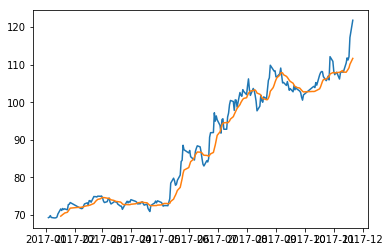

In [20]:
import matplotlib.pyplot as plt
ma10Series = pd.DataFrame(ma10,index=data['600036.XSHG'].index)
plt.plot(data['600036.XSHG'].index,data['600036.XSHG']['close'])
plt.plot(ma10Series.index,ma10Series)
plt.show()

# 题目四

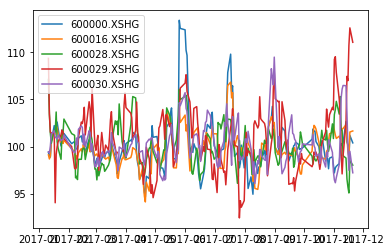

In [21]:
dateIndex=data['600000.XSHG'].index
ROCR100df=pd.DataFrame(index=dateIndex)
for name in data.keys():
    closeArray = data[name]['close'].values
    ROCR100Array=ta.ROCR100(closeArray,timeperiod=5)
    ROCR100=pd.DataFrame(ROCR100Array,index=data[name].index.values,columns=[name])
    ROCR100df=pd.merge(ROCR100df,ROCR100,left_index=True,right_index=True,how='left')
p1,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,0])
p2,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,1])
p3,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,2])
p4,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,3])
p5,=plt.plot(ROCR100df.index,ROCR100df.iloc[:,4])
plt.legend([p1,p2,p3,p4,p5],ROCR100df.columns.values[0:5])
plt.show()